In [7]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [8]:
df = yf.download('AAPL', start='2012-01-01', end='2025-08-14')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10748\3395633041.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2025-08-14')
[*********************100%***********************]  1 of 1 completed


In [9]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345170,12.383296,12.278226,12.290234,302220800
2012-01-04,12.411515,12.448741,12.286632,12.308246,260022000
2012-01-05,12.549307,12.564917,12.388399,12.456845,271269600
2012-01-06,12.680497,12.691004,12.585033,12.601544,318292800
2012-01-09,12.660386,12.841107,12.648978,12.773563,394024400


In [10]:
df.shape

(3423, 5)

In [16]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345170,12.383296,12.278226,12.290234,302220800
2012-01-04,12.411515,12.448741,12.286632,12.308246,260022000
2012-01-05,12.549307,12.564917,12.388399,12.456845,271269600
2012-01-06,12.680497,12.691004,12.585033,12.601544,318292800
2012-01-09,12.660386,12.841107,12.648978,12.773563,394024400
...,...,...,...,...,...
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000


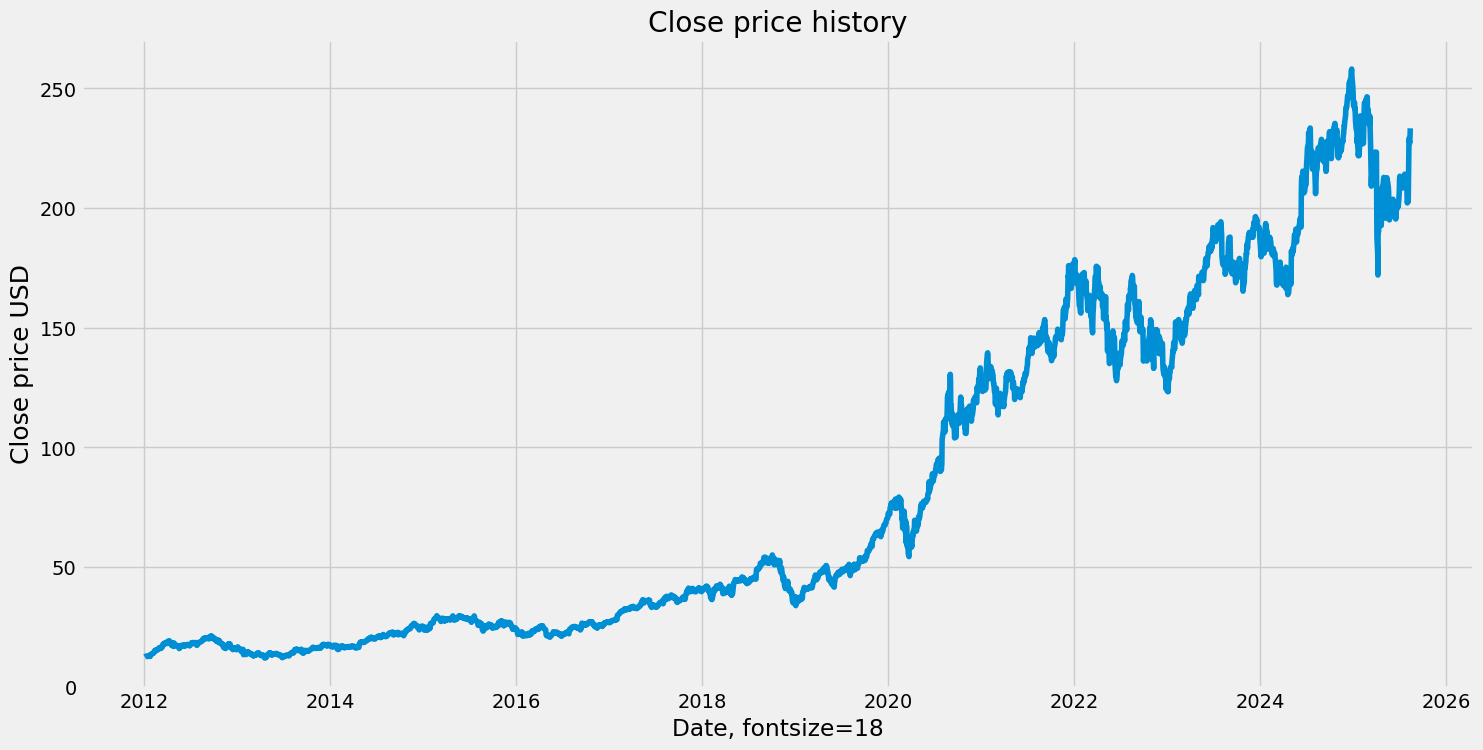

In [11]:
#visualise closing price

plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])

plt.xlabel('Date, fontsize=18')
plt.ylabel('Close price USD', fontsize =18)
plt.show()

In [21]:
df.columns = df.columns.droplevel(1) 
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,12.345170,12.383296,12.278226,12.290234,302220800
2012-01-04,12.411515,12.448741,12.286632,12.308246,260022000
2012-01-05,12.549307,12.564917,12.388399,12.456845,271269600
2012-01-06,12.680497,12.691004,12.585033,12.601544,318292800
2012-01-09,12.660386,12.841107,12.648978,12.773563,394024400
...,...,...,...,...,...
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100


In [22]:
#new df with only close

data = df.filter(['Close'])

#convert to numpy
dataset = data.values
#get no of rows to train model

training_data_len = math.ceil(len(dataset)* 0.8)

training_data_len

2739

In [23]:
data

,Close
Date,
2012-01-03,12.345170
2012-01-04,12.411515
2012-01-05,12.549307
2012-01-06,12.680497
2012-01-09,12.660386
...,...
2025-08-07,219.780563
2025-08-08,229.090012
2025-08-11,227.179993


In [24]:
#scale data

scaler =MinMaxScaler(feature_range = (0,1))

scaled_data =scaler.fit_transform(dataset)

In [25]:
scaled_data

array([[0.0018211 ],
       [0.00209057],
       [0.00265023],
       ...,
       [0.8743994 ],
       [0.88443162],
       [0.89937843]])

In [28]:
#create training dataaset -scaled

train_data = scaled_data[0:training_data_len, :]

x_train =[]

y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])

    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()



[array([0.0018211 , 0.00209057, 0.00265023, 0.00318307, 0.00310139,
       0.0032855 , 0.00320135, 0.00305992, 0.00286726, 0.00346352,
       0.00400124, 0.0038354 , 0.00292701, 0.00379394, 0.00294042,
       0.00614111, 0.00589359, 0.0062167 , 0.00691536, 0.00733845,
       0.00730309, 0.00717263, 0.00772864, 0.00825172, 0.00884431,
       0.00980145, 0.01181208, 0.01184254, 0.01296189, 0.01379836,
       0.01236077, 0.01291435, 0.01290336, 0.01445553, 0.01423485,
       0.01464333, 0.01537734, 0.01578583, 0.01696244, 0.0178196 ,
       0.0180671 , 0.01815371, 0.01668811, 0.01633449, 0.01638693,
       0.01776476, 0.01815247, 0.01898527, 0.02094834, 0.02356739,
       0.02307724, 0.02307845, 0.02497204, 0.02556465, 0.02514273,
       0.02475742, 0.0243563 , 0.025689  , 0.02660349, 0.02698632])]
[0.026040130958188662]

[array([0.0018211 , 0.00209057, 0.00265023, 0.00318307, 0.00310139,
       0.0032855 , 0.00320135, 0.00305992, 0.00286726, 0.00346352,
       0.00400124, 0.0038354 , 0.0